# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1: Lidor Margi ID: 205976905

# Details Student 2: Bar Bitton ID: 313465551


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [44]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [45]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [46]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [47]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [48]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [49]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [50]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [51]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [52]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [53]:
 def df_clean_text(df_to_clean):
    # Loop through each element in the series
    for index in df_to_clean.index:
        # Remove non-Hebrew characters and special symbols
        df_to_clean["story"][index] = re.sub(r'[^\u0590-\u05FF\s]', '', df_to_clean["story"][index])
        
        # Remove digits and periods
        df_to_clean["story"][index] = re.sub(r'\d+|\.', '', df_to_clean["story"][index])
    
    # Return the cleaned df
    return df_to_clean

In [54]:
df_train = df_clean_text(df_train)
df_test = df_clean_text(df_test)

In [55]:
df_train.head(8)
df_test.shape

,story,gender
0,כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פ...,m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,כשהייתי ילד מטוסים היה הדבר שהכי ריתק אותי בתו...,m
4,הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכים...,f
5,לפני כ חודשים טסתי לרומא למשך שבוע טסתי במטוס ...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב הדירה הי...,f


(323, 2)

In [56]:
# Update 'gender' column: Change 'm' to 1, and everything else to 0
df_train['gender'] = np.where(df_train['gender'] == 'm', 1, 0)

df_train.head(8)

,story,gender
0,כשחבר הזמין אותי לחול לא באמת חשבתי שזה יקרה פ...,1
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,1
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,0
3,כשהייתי ילד מטוסים היה הדבר שהכי ריתק אותי בתו...,1
4,הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכים...,0
5,לפני כ חודשים טסתי לרומא למשך שבוע טסתי במטוס ...,0
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,1
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב הדירה הי...,0


([<matplotlib.patches.Wedge at 0x1b369cb4e50>,
 [Text(0.14263080614858145, -1.090713735650838, '1'),
  Text(-0.1426308061485813, 1.090713735650838, '0')],
 [Text(0.07779862153558988, -0.594934764900457, '76.4%'),
  Text(-0.07779862153558981, 0.594934764900457, '23.6%')])

(-1.0999999348536713,
 1.0999999737654125,
 -1.0999997135513309,
 1.0999958408235666)

Text(0.5, 1.0, 'Gender Distribution')

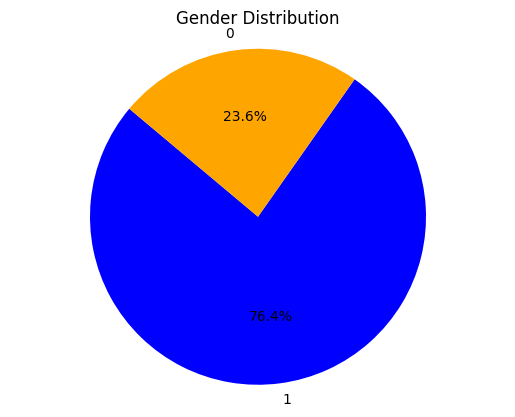

In [57]:
# Extract 'story' and 'gender' columns into X_train and y_train
X_train, y_train = df_train['story'], df_train['gender']
# Calculate the count of each class in the 'gender' column
class_counts = y_train.value_counts()
# Get the unique class labels (in this case, 0 and 1)
labels = class_counts.index

colors = ['blue', 'orange']
# Create a pie chart to visualize the class distribution
plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()

In [58]:
def create_count_vectorizer(df):
    # Initialize the CountVectorizer
    vectorizer = CountVectorizer()

    # Transform the 'story' column and store the result in X_train
    X_train = vectorizer.fit_transform(df['story'])

    # Return the fitted CountVectorizer object
    return vectorizer

In [59]:
count_vectorizer = create_count_vectorizer(df_train)

In [60]:
# Split the dataset into training and validation sets (X_train, X_val, y_train, y_val)
X_train, X_val, y_train, y_val = train_test_split(df_train['story'], df_train['gender'], test_size=0.2, random_state=42)
# Create a CountVectorizer to convert text data into numerical vectors
count_vectorizer = create_count_vectorizer(df_train)
# Transform the text data in both the training and validation sets into numerical feature vectors
X_train_vec = count_vectorizer.transform(X_train)
X_val_vec = count_vectorizer.transform(X_val)

In [61]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
# Fit the Decision Tree Classifier to the training data
dt_classifier.fit(X_train_vec, y_train)
# Make predictions on the validation data
y_pred = dt_classifier.predict(X_val_vec)
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")


DecisionTreeClassifier()

Accuracy: 0.69


In [62]:
naive_bayes_model = MultinomialNB()

# Train the Naive Bayes model
naive_bayes_model.fit(X_train_vec, y_train)

# Make predictions on the validation set
y_pred = naive_bayes_model.predict(X_val_vec)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

MultinomialNB()

Accuracy: 0.73


In [63]:
linear_svc_model = LinearSVC()

# Train the LinearSVC model
linear_svc_model.fit(X_train_vec, y_train)

# Make predictions on the validation set
y_pred = linear_svc_model.predict(X_val_vec)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

LinearSVC()

Accuracy: 0.79


In [66]:
# Create and train a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_vec, y_train)

# Make predictions on the validation set
y_pred = knn_model.predict(X_val_vec)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

KNeighborsClassifier()

Accuracy: 0.75


In [72]:
def calculate_f1_score(model, X_train_vec, y_train, X_val_vec, y_val):
    # Train the model
    model.fit(X_train_vec, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_val_vec)

    # Calculate the F1 score
    f1 = f1_score(y_val, y_pred)

    return f1

# List of models to evaluate
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('LinearSVC', LinearSVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
]

# Calculate and print F1 scores for all models
for model_name, model in models:
    f1 = calculate_f1_score(model, X_train_vec, y_train, X_val_vec, y_val)
    print(f"{model_name} - F1 Score: {f1:.2f}")

Decision Tree - F1 Score: 0.82
Multinomial Naive Bayes - F1 Score: 0.86
LinearSVC - F1 Score: 0.87
K-Nearest Neighbors - F1 Score: 0.86


In [70]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
# Initialize the LinearSVC model
linear_svc_model = LinearSVC()

# Train the LinearSVC model
linear_svc_model.fit(X_train_vec, y_train)

# Make predictions on the test set
X_test_vec = vectorizer.transform(df_test['story'])
y_test_pred = linear_svc_model.predict(X_test_vec)

# Create a DataFrame with the test predictions
df_predicted = pd.DataFrame({'test_example_id': df_test['test_example_id'], 'predicted_category': y_test_pred})

LinearSVC()

In [71]:
df_predicted['predicted_category'] = np.where(df_predicted['predicted_category'] == 1, 'm', 'f')

df_predicted.head(25)

,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,m
5,5,m
6,6,m
7,7,m
8,8,m
9,9,m


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [ ]:
df_predicted.to_csv('classification_results.csv',index=False)